We will use Google Colaboratory to write and execute a Python program interactively via a web browser. The Colaboratory is a free cloud service hosted by Google that requires no setup.


**Linear Regression Using scikit-learn for Advertising Problem**


What are the features?
* TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
* Radio: advertising dollars spent on Radio
* Newspaper: advertising dollars spent on Newspaper

What is the response?
* Sales: sales of a single product in a given market (in thousands of items)

What else do we know?
* Because the response variable is quantitative, this is a regression problem.
* There are 200 observations (represented by the rows), and each observation is a single market.



**Pandas**
*   use the pandas library to read data into Python
*   pandas is an open source library providing high-performance
*   easy-to-use data structures and data analysis tools for the Python programming 


In [140]:
import pandas as pd

In [154]:
import patsy
from patsy import dmatrices

read CSV file directly from a URL and save the results

In [172]:
data = pd.read_csv("ToyotaCorolla.csv")

display the first 5 rows

In [173]:
data.head()

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
0,16605,23,29196,Diesel,90,1,0,122,3,2568
1,16913,23,45321,Diesel,90,1,0,122,3,2568
2,17159,24,25918,Diesel,90,1,0,122,3,2568
3,18389,26,29826,Diesel,90,0,0,122,3,2568
4,16913,30,23923,Diesel,90,0,0,122,3,2579


display the last 5 rows

In [174]:
data.tail()

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
1431,9225,69,12765,Petrol,86,1,0,79,3,2260
1432,13339,72,11806,Petrol,86,0,0,79,3,2238
1433,10455,71,10573,Petrol,86,0,0,79,3,2238
1434,8918,70,10511,Petrol,86,1,0,79,3,2238
1435,8549,76,1,Petrol,110,0,0,98,5,2456


check the shape of the DataFrame (rows, columns)

In [175]:
data.shape

(1436, 10)

Use the describe method to generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [176]:
data.describe()

,Price,Age,Mileage,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,13199.266017,55.947075,42584.589136,101.502089,0.674791,0.055710,95.720752,4.033426,2364.442897
std,4461.162081,18.599988,23305.402480,14.981080,0.468616,0.229441,11.587120,0.952677,115.945453
min,5351.000000,1.000000,1.000000,69.000000,0.000000,0.000000,79.000000,2.000000,2205.000000
25%,10394.000000,44.000000,26719.000000,90.000000,0.000000,0.000000,85.000000,3.000000,2293.000000
50%,12177.000000,61.000000,39388.500000,110.000000,1.000000,0.000000,98.000000,4.000000,2359.000000
75%,14699.000000,70.000000,54072.000000,110.000000,1.000000,0.000000,98.000000,5.000000,2392.000000
max,39975.000000,80.000000,150993.000000,192.000000,1.000000,1.000000,122.000000,5.000000,3560.000000


**Visualizing data using seaborn**

*   Seaborn: Python library for statistical data visualization built on top of Matplotlib


In [177]:
import seaborn as sns

Visualize the relationship between the features and the response using scatterplots


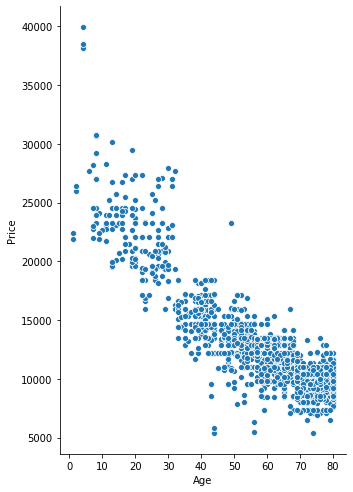

In [178]:
sns.pairplot(data, x_vars=['Age'], y_vars='Price', height=7, aspect=0.7)

**Fit a linear model**

Preparing X and y using pandas:
* scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
* However, pandas is built on top of NumPy.
* Thus, X can be a pandas DataFrame and y can be a pandas Series!


In [282]:
X = data[['Age', 'Price', 'Horsepower', 'MetColor', 'Automatic', 'Displacement', 'Doors', 'Weight']]
y = data['Mileage']

In [283]:
X.head()

,Age,Price,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
0,23,16605,90,1,0,122,3,2568
1,23,16913,90,1,0,122,3,2568
2,24,17159,90,1,0,122,3,2568
3,26,18389,90,0,0,122,3,2568
4,30,16913,90,0,0,122,3,2579


Equivalent command that works if there are no spaces in the column name

In [284]:
y.head()

0    29196
1    45321
2    25918
3    29826
4    23923
Name: Mileage, dtype: int64

Print the first 5 rows of X and y

In [285]:
print(X.head())
print(y.head())

   Age  Price  Horsepower  MetColor  Automatic  Displacement  Doors  Weight
0   23  16605          90         1          0           122      3    2568
1   23  16913          90         1          0           122      3    2568
2   24  17159          90         1          0           122      3    2568
3   26  18389          90         0          0           122      3    2568
4   30  16913          90         0          0           122      3    2579
0    29196
1    45321
2    25918
3    29826
4    23923
Name: Mileage, dtype: int64


**Validation Set Approach**

Splitting X and y into training and testing sets

In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

X_train.head()


,Age,Price,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
607,62,9225,72,1,0,122,5,2513
1318,78,10455,110,0,0,98,5,2392
927,67,11378,86,0,0,79,4,2205
1036,62,11009,86,1,0,79,5,2282
487,54,11009,69,0,0,122,5,2513


import linear regression model

In [287]:
from sklearn.linear_model import LinearRegression

**instantiate**

In [288]:
linreg = LinearRegression()

Fit the model to the training data (learn the coefficients)


In [289]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print the intercept and coefficients

In [290]:
print(linreg.intercept_)
print(linreg.coef_)

-33903.84965347911
[ 1.05053672e+02 -3.06302058e+00 -2.50226986e+02 -6.26344827e+02
 -3.84140410e+03  6.52379451e+02  3.93000247e+02  3.07930814e+01]


# Use statsmodels module

In [291]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Mileage   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     156.8
Date:                Sat, 12 Oct 2019   Prob (F-statistic):          1.03e-177
Time:                        23:18:44   Log-Likelihood:                -12735.
No. Observations:                1148   AIC:                         2.549e+04
Df Residuals:                    1139   BIC:                         2.553e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -3.39e+04   1.32e+04     -2.560   

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Interpreting model coefficients

How do we interpret the TV coefficient (0.0468)?
* For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0468 "unit" increase in Sales.
* Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.8 items.


# Making predictions
make predictions on the testing set

In [275]:
y_pred = linreg.predict(X_test)

In [276]:
X_test.head()

,Age,Mileage,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
509,46,33368,97,1,0,85,5,2337
435,53,49585,110,0,0,98,5,2370
321,36,22537,110,1,0,98,5,2370
1055,70,111101,72,0,0,122,3,2458
288,44,27476,97,1,0,85,5,2337


In [277]:
y_pred

array([14693.49716853, 13623.71147261, 17179.20473923,  7783.3820328 ,
       15194.83069743, 21543.43137608,  9227.48249026, 12263.62695358,
        8634.50327047, 14299.83242778, 12037.671214  , 12000.61231416,
        9447.62390912, 11049.02403239,  8104.77060392,  9997.34789613,
        7266.37999932,  8905.44192382, 21182.64758738,  7046.37068835,
       20269.12584681,  8593.97609238, 11277.75026471,  8296.35346719,
       16303.49645374, 22855.44059181,  9708.10843512, 12772.16752726,
       22182.72825039, 12774.62373889,  9791.2730886 , 10672.20374569,
       16660.93378407, 21134.2658255 , 32583.95255659, 12518.99906697,
       13148.49340896,  9537.22299529, 11121.7330548 , 20554.73209774,
       14946.04595299, 11305.93060289, 10343.65729934, 12563.60102194,
        9997.42393349, 12274.62585912, 13614.04174814, 11042.91947589,
        7965.11092285,  8359.96431387,  9098.35204066, 13909.86893846,
       11598.10976397,  8070.95591486, 10145.99386333, 23958.82373754,
      

In [278]:
y_test

509     13407
435     13401
321     13223
1055     7995
288     14631
        ...  
1359    10763
215     13469
135     20295
800     11064
994      9533
Name: Price, Length: 288, dtype: int64

# Accuracy metrics for regression
Calculate MAE using scikit-learn


In [279]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

1191.7258678707158


In [280]:
y_train_pred = linreg.predict(X_train)
print(metrics.mean_absolute_error(y_train, y_train_pred))

1205.8512389888822


Calculate MSE using scikit-learn
Mean Squared Error (MSE) is the mean of the squared errors:

In [281]:
print(metrics.mean_squared_error(y_test, y_pred))

2426631.733151488


# Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the MSE!


In [260]:
X = data[['Mileage', 'Horsepower', 'MetColor', 'Automatic', 'Displacement', 'Doors', 'Weight']]

Split into training and testing sets

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=3)

Fit the model to the training data (learn the coefficients)


In [262]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Make predictions on the testing set

In [263]:
y_pred = linreg.predict(X_test)

Compute the MSE of our predictions


In [264]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

1827.0883236845937
8626331.046979722


**Cross-validation**

Advantages of cross-validation:
* More accurate estimate of test error
* More "efficient" use of data (every observation is used for both training and testing)

Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset


In [259]:
from sklearn.model_selection import cross_val_score


# 10-fold cross-validation with all three features

In [ ]:
lm = LinearRegression()
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
scores = cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
print(-scores)

Calculate the average MSE


In [ ]:
print(-scores.mean())
print(scores.std())


# 10-fold cross-validation with one feature


In [ ]:
X = data[['TV']]
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores)
print(-scores.mean())
print(scores.std())

In [ ]:
X = data[['Radio']]
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores)
print(-scores.mean())
print(scores.std())

In [ ]:
X = data[['Newspaper']]
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores)
print(-scores.mean())
print(scores.std())